# Geospatial Data Analytics with Python - Example 2-1: Japan Universities
___

## A) Dataset load with Pandas

In [1]:
# Libraries import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# CSV Dataset Load
df = pd.read_csv('/IT Training/DatasetsForLearning/GSDA/DATA-Japan_Universities.csv')
df.head()

,Unnamed: 0,code,name,name_jp,type,type_jp,address,postal_code,phone,state,...,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,F101110100010,Hokkaido University,北海道大学,National,国立,北海道札幌市北区北8条西5丁目,060－0808,011－716－2111,Hokkai Do,...,141.347153,1876-08,33,78,True,False,4.16,1389.0,60.4,A
1,1,F101110100029,Hokkaido University of Education,北海道教育大学,National,国立,北海道札幌市北区あいの里5条3－1－3,002－8501,011－778－0206,Hokkai Do,...,141.393753,1943-04,3,8,True,False,3.79,544.0,47.1,D
2,2,F101110100038,Muroran Institute of Technology,室蘭工業大学,National,国立,北海道室蘭市水元町27－1,050－8585,0143－46－5000,Hokkai Do,...,141.034042,1897-05,3,10,True,False,3.66,126.0,39.0,F
3,3,F101110100047,Otaru University of Commerce,小樽商科大学,National,国立,北海道小樽市緑3－5－21,047－8501,0134－27－5206,Hokkai Do,...,140.979370,1910-03,2,6,True,False,3.80,257.0,50.0,C
4,4,F101110100056,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,国立,北海道帯広市稲田町西2線11,080－8555,0155－49－5216,Hokkai Do,...,143.177979,1941-04,3,5,True,False,4.20,87.0,54.5,B


In [44]:
# Columns Removal
df=df.drop(['Unnamed: 0', 'code', 'type_jp', 'address', 'postal_code', 'phone', 'found', 'has_grad', 'has_remote'],axis=1)
df.head()

,name,name_jp,type,state,state_jp,latitude,longitude,faculty_count,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
0,Hokkaido University,北海道大学,National,Hokkai Do,北海道,43.070446,141.347153,33,78,4.16,1389.0,60.4,A
1,Hokkaido University of Education,北海道教育大学,National,Hokkai Do,北海道,43.170498,141.393753,3,8,3.79,544.0,47.1,D
2,Muroran Institute of Technology,室蘭工業大学,National,Hokkai Do,北海道,42.378716,141.034042,3,10,3.66,126.0,39.0,F
3,Otaru University of Commerce,小樽商科大学,National,Hokkai Do,北海道,43.190952,140.979370,2,6,3.80,257.0,50.0,C
4,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,Hokkai Do,北海道,42.872356,143.177979,3,5,4.20,87.0,54.5,B


In [4]:
# Display the number of entries (number of rows and columns)
rows,cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 813
Number of columns: 13


In [5]:
# Remove any white spaces in columns
df.columns = df.columns.str.strip()
# Display column names
df.columns

Index(['name', 'name_jp', 'type', 'state', 'state_jp', 'latitude', 'longitude',
       'faculty_count', 'department_count', 'review_rating', 'review_count',
       'difficulty_SD', 'difficulty_rank'],
      dtype='object')

In [6]:
# Display datatypes
df.dtypes

name                 object
name_jp              object
type                 object
state                object
state_jp             object
latitude            float64
longitude           float64
faculty_count         int64
department_count      int64
review_rating       float64
review_count        float64
difficulty_SD       float64
difficulty_rank      object
dtype: object

Text(0.5, 1.0, 'Missing values present in columns')

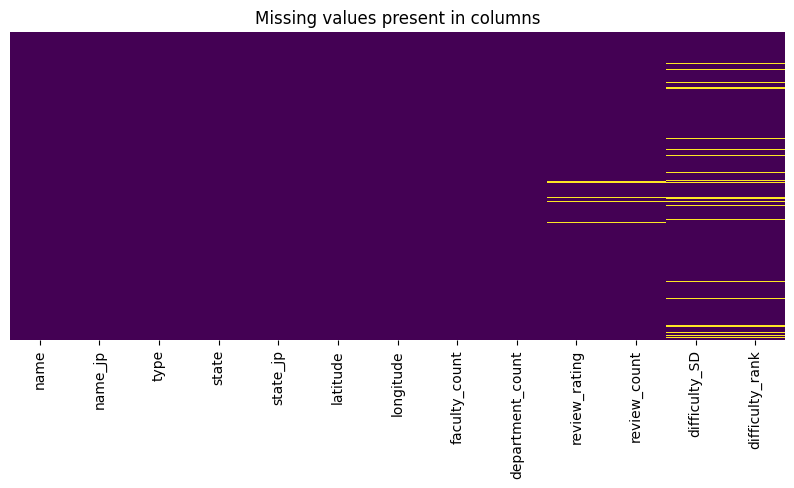

In [11]:
# Display any missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values present in columns') 

### EDA

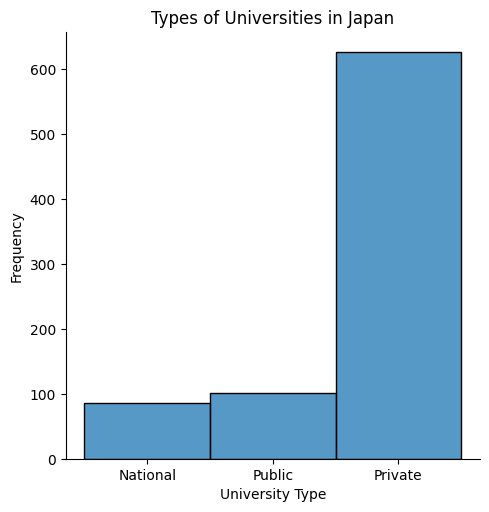

In [16]:
# Distribution of universities in Japan
sns.displot(df['type'])
plt.title('Types of Universities in Japan')
plt.xlabel('University Type')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Show prefectures where universities are located
df['state'].unique()

array(['Hokkai Do', 'Aomori Ken', 'Iwate Ken', 'Miyagi Ken', 'Akita Ken',
       'Yamagata Ken', 'Fukushima Ken', 'Ibaraki Ken', 'Tochigi Ken',
       'Gunma Ken', 'Saitama Ken', 'Chiba Ken', 'Tokyo To',
       'Kanagawa Ken', 'Niigata Ken', 'Toyama Ken', 'Ishikawa Ken',
       'Fukui Ken', 'Yamanashi Ken', 'Nagano Ken', 'Gifu Ken',
       'Shizuoka Ken', 'Aichi Ken', 'Mie Ken', 'Shiga Ken', 'Kyoto Fu',
       'Osaka Fu', 'Hyogo Ken', 'Nara Ken', 'Wakayama Ken', 'Tottori Ken',
       'Shimane Ken', 'Okayama Ken', 'Hiroshima Ken', 'Yamaguchi Ken',
       'Tokushima Ken', 'Kagawa Ken', 'Ehime Ken', 'Kochi Ken',
       'Fukuoka Ken', 'Saga Ken', 'Nagasaki Ken', 'Kumamoto Ken',
       'Oita Ken', 'Miyazaki Ken', 'Kagoshima Ken', 'Okinawa Ken'],
      dtype=object)

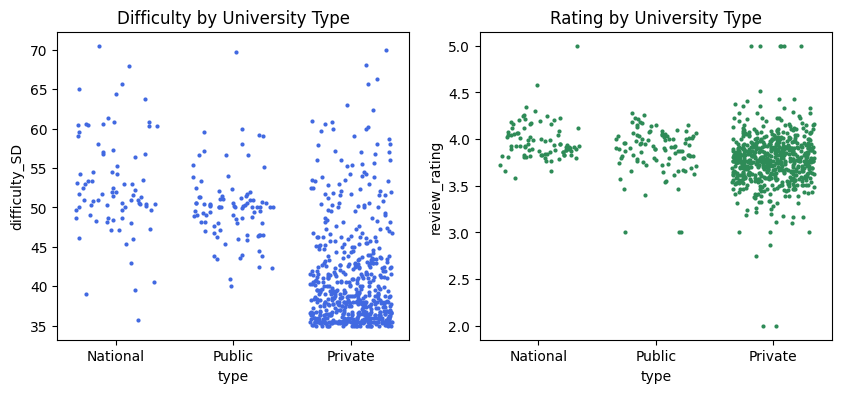

In [41]:
# Correlation (difficulty & type) versus (rating & type)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.stripplot(df, x="type", y="difficulty_SD", ax=ax[0], jitter=0.35, size=3, color='royalblue')
sns.stripplot(df, x="type", y="review_rating", ax=ax[1], jitter=0.35, size=3, color='seagreen')

ax[0].set_title('Difficulty by University Type')
ax[1].set_title('Rating by University Type')
plt.show()

In [123]:
# Show top ten prefectures with the most universities
pc=df['state'].value_counts().reset_index()
pc=pc.head(10)
pc

,state,count
0,Tokyo To,146
1,Osaka Fu,58
2,Aichi Ken,52
3,Hokkai Do,37
4,Fukuoka Ken,36
5,Hyogo Ken,36
6,Kyoto Fu,34
7,Kanagawa Ken,33
8,Chiba Ken,27
9,Saitama Ken,27


Text(0.5, 1.0, 'Top ten Japanese prefectures of with the most universities')

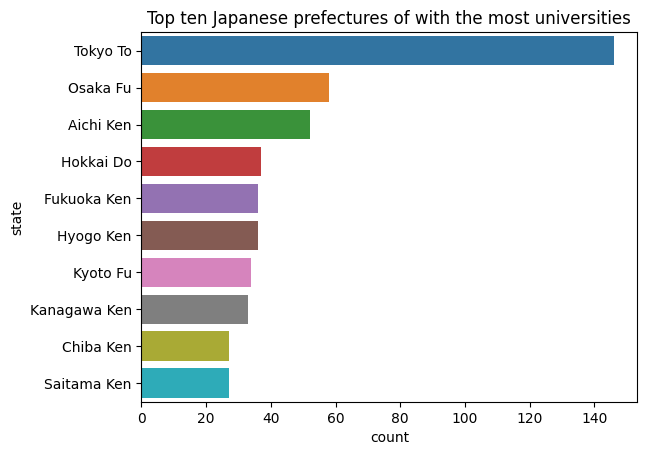

In [130]:
# Top ten prefectures with the most universities
sns.barplot(pc, x='count', y='state', orient='h', hue='state')
plt.title('Top ten Japanese prefectures of with the most universities')

In [133]:
# Total number of Tokyo Universities
sum(df[df['state']=='Tokyo To'].value_counts())

124

In [145]:
# Create a new DataFrame with the desired structure to breakdown the university types in Tokyo
tu = pd.pivot_table(df[df['state']=='Tokyo To'], index='state', columns='type', aggfunc='size')
tu['Total'] = tu.sum(axis=1)
tu

type,National,Private,Public,Total
state,,,,
Tokyo To,12,132,2,146


In [148]:
# Mean faculty count in each type of university
# df.groupby(['type']).mean('faculty_count')
df.groupby('type')['faculty_count'].mean()

type
National    9.965116
Private     5.678914
Public      4.495050
Name: faculty_count, dtype: float64

In [149]:
# Mean department count in each type of university
df.groupby('type')['department_count'].mean()

type
National    28.941860
Private     10.953674
Public       9.128713
Name: department_count, dtype: float64

In [150]:
#  Show review counts for different university types in Japan
pd.pivot_table(df, index='type', columns='difficulty_rank', aggfunc='size', fill_value=0)

difficulty_rank,A,B,C,D,E,F,S
type,,,,,,,
National,12,11,35,14,3,2,5
Private,9,19,37,52,141,318,4
Public,3,8,46,25,9,0,1


In [151]:
#  Show review counts for different university types in Tokyo ONLY
pd.pivot_table(df[df['state']=='Tokyo To'], index='type', columns='difficulty_rank', aggfunc='size', fill_value=0)

difficulty_rank,A,B,C,D,E,F,S
type,,,,,,,
National,3,4,1,0,0,0,3
Private,7,10,17,22,26,27,4
Public,0,1,0,0,0,0,0


___
## B) GeoDataFrame Conversion (Coordinates data)

In [46]:
# Libraries import
import geopandas as gpd
import geodatasets
from geodatasets import get_path

In [51]:
# Conversion of latitude & longitude into Geometry: points_from_xy()
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,name,name_jp,type,state,state_jp,latitude,longitude,faculty_count,department_count,review_rating,review_count,difficulty_SD,difficulty_rank,geometry
0,Hokkaido University,北海道大学,National,Hokkai Do,北海道,43.070446,141.347153,33,78,4.16,1389.0,60.4,A,POINT (141.34715 43.07045)
1,Hokkaido University of Education,北海道教育大学,National,Hokkai Do,北海道,43.170498,141.393753,3,8,3.79,544.0,47.1,D,POINT (141.39375 43.17050)
2,Muroran Institute of Technology,室蘭工業大学,National,Hokkai Do,北海道,42.378716,141.034042,3,10,3.66,126.0,39.0,F,POINT (141.03404 42.37872)
3,Otaru University of Commerce,小樽商科大学,National,Hokkai Do,北海道,43.190952,140.979370,2,6,3.80,257.0,50.0,C,POINT (140.97937 43.19095)
4,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,Hokkai Do,北海道,42.872356,143.177979,3,5,4.20,87.0,54.5,B,POINT (143.17798 42.87236)


<Axes: >

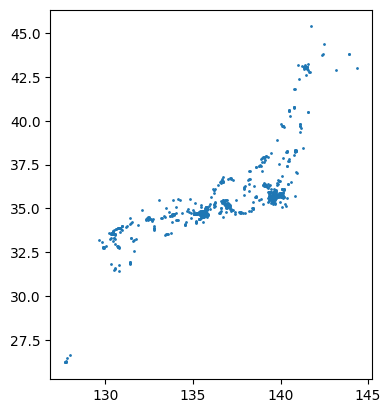

In [49]:
# Quick plot of coordinates without map base layer
gdf.plot(markersize=1)

In [53]:
# CSV conversion to Shapefile(.shp)
gdf.to_file("/Python for Solbridge Teaching/GS Localdata/localdata/japuni.shp", crs='EPSG:4326')

C:\Users\likre\AppData\Local\Temp\ipykernel_34096\2759595265.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("/Python for Solbridge Teaching/GS Localdata/localdata/japuni.shp", crs='EPSG:4326')


DriverIOError: Failed to create file /Python for Solbridge Teaching/GS Localdata/localdata\japuni.shp: No error